# Métodos Numéricos 

**Nombre:** Luis Alexander Lema Delgado
**Materia:** Métodos Numéricos  
**Fecha:** 12/05/2025

### Método de Newton

Convergencia alcanzada en iteración 5
La raíz aproximada es: 1.8954942670339812


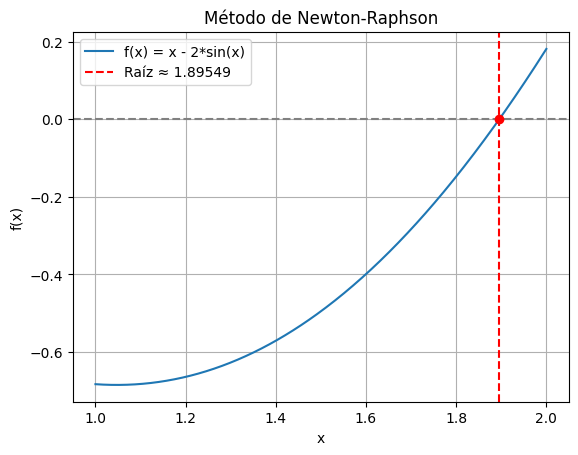

In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt

'''
Método de Newton-Raphson para encontrar raíces de una función.
Se necesita la función y su derivada, además de un punto inicial cercano a la raíz.
Ojo con puntos donde la derivada es cero, porque el método no funciona ahí.
'''

def metodo_newton(func, derivada, x_inicial, tolerancia, max_iter):
    x = x_inicial

    for i in range(1, max_iter + 1):
        fx = func(x)
        dfx = derivada(x)

        if dfx == 0:
            print("Derivada cero en el punto actual. Deteniendo método.")
            return None

        x_nuevo = x - fx / dfx

        if abs(x_nuevo - x) < tolerancia:
            print(f"Convergencia alcanzada en iteración {i}")
            return x_nuevo

        x = x_nuevo

    print(f"No se logró converger después de {max_iter} iteraciones.")
    return None

# Función y su derivada para este ejemplo
def f(x):
    return x - 2 * math.sin(x)

def df(x):
    return 1 - 2 * math.cos(x)

# Parámetros
x0 = 1.5
tol = 1e-5
max_iter = 100

raiz = metodo_newton(f, df, x0, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Para graficar, usamos numpy y matplotlib (solo aquí)
    x_vals = np.linspace(1, 2, 400)
    y_vals = [f(x) for x in x_vals]

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color='gray', linestyle='--')
    plt.axvline(raiz, color='red', linestyle='--', label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'ro')
    plt.title("Método de Newton-Raphson")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo hallar la raíz.")


### Método de la Secante

Convergencia lograda en la iteración 5
La raíz aproximada es: 1.895494266655171


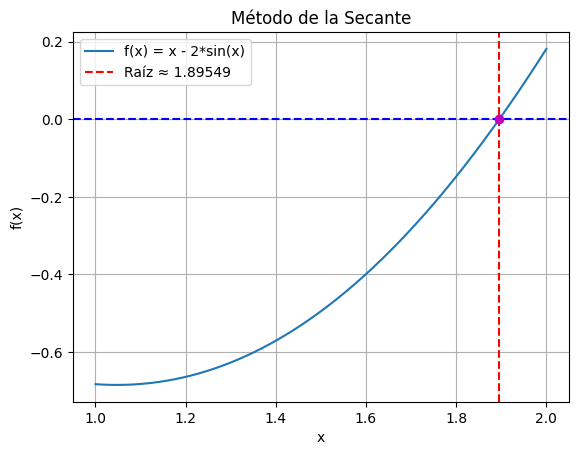

In [2]:

import math
import numpy as np
import matplotlib.pyplot as plt

'''
Método de la Secante para encontrar raíces sin necesidad de la derivada.
Se usan dos puntos iniciales para aproximar la raíz, usando la fórmula de la secante.
'''

def metodo_secante(func, x0, x1, tolerancia, max_iter):
    for i in range(1, max_iter + 1):
        f_x0 = func(x0)
        f_x1 = func(x1)

        if f_x1 - f_x0 == 0:
            print("Error: división entre cero. Método detenido.")
            return None

        x2 = x1 - f_x1 * (x1 - x0) / (f_x1 - f_x0)

        if abs(x2 - x1) < tolerancia:
            print(f"Convergencia lograda en la iteración {i}")
            return x2

        x0, x1 = x1, x2

    print(f"No se logró converger tras {max_iter} iteraciones.")
    return None


# Definimos la función (igual que antes)
def f(x):
    return x - 2 * math.sin(x)


# Parámetros iniciales para la secante
x0 = 1.0
x1 = 2.0
tol = 1e-5
max_iter = 100

raiz = metodo_secante(f, x0, x1, tol, max_iter)

if raiz is not None:
    print(f"La raíz aproximada es: {raiz}")

    # Para graficar sí usamos numpy y matplotlib
    x_vals = np.linspace(1, 2, 400)
    y_vals = [f(x) for x in x_vals]

    plt.plot(x_vals, y_vals, label="f(x) = x - 2*sin(x)")
    plt.axhline(0, color='blue', linestyle='--')
    plt.axvline(raiz, color='red', linestyle='--', label=f"Raíz ≈ {raiz:.5f}")
    plt.plot(raiz, f(raiz), 'mo')  # punto morado para la raíz
    plt.title("Método de la Secante")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No se pudo encontrar la raíz.")

